# Data Exploration

In [2]:
# Input Data
import pandas as pd
shoppers = pd.read_table('data/shoppers.txt', na_values = '\\N',names = ['shopper_date','Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators','shopper','date','visits','day_of_week_type','arrival'])
shoppers.shape

(285415, 16)

In [3]:
shoppers.head()

,shopper_date,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,shopper,date,visits,day_of_week_type,arrival
0,2017-01-02#297225,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297225,2017-01-02,81,1,11
1,2017-02-26#508299,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,508299,2017-02-26,4,0,10
2,2017-03-12#545218,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545218,2017-03-12,3,0,14
3,2017-01-24#762703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,762703,2017-01-24,2,2,12
4,2017-04-22#817932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,817932,2017-04-22,1,6,13


In [4]:
# Calculate the average dwell in each column
zone_columns = ['Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators']
shoppers[zone_columns].mean()

Gallery King Furniture        38.251102
Ground BBQ Ranch              23.674745
Ground Dish Kiosk             59.222941
Ground Freedom                28.032471
Level 1 Dare Gallery          38.855041
Level 1 JB HiFi              224.639099
Level 1 Nick Scali            27.198296
Level 2 Harvey Norman        124.664746
Lower Ground Baby Bunting     27.277391
Lower Ground Escalators       12.965345
dtype: float64

In [5]:
# Calculate the average number of visits per shopper
print('Average visits per shopper: ',shoppers[['shopper','date']].groupby(['shopper']).agg(['count']).mean())

Average visits per shopper:  date  count    2.558995
dtype: float64


In [6]:
# Calculate min and max number of visits
print('Min ', shoppers[['visits']].min())
print('Max ', shoppers[['visits']].max())

Min  visits    1
dtype: int64
Max  visits    181
dtype: int64


## Plot shoppers per day

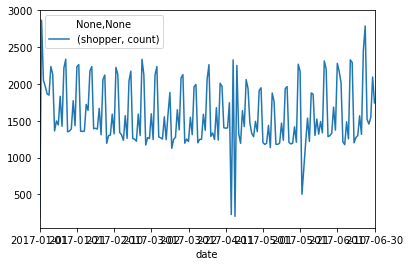

In [7]:
import matplotlib.pyplot as plt

daily_shoppers = shoppers[['shopper','date']].groupby(['date']).agg(['count'])

daily_shoppers_plt = daily_shoppers.plot()
plt.show(daily_shoppers_plt)

The two downward spikes are for Easter Friday and Easter Sunday when the centre was closed. Another two consecutive downward spike on 22-23 May was a backhaul connection outage.

## Plot shoppers by day of week

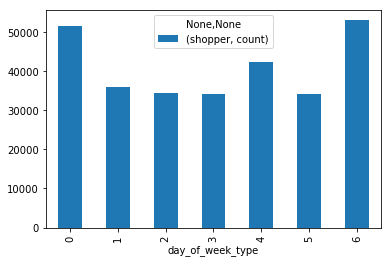

In [8]:
import matplotlib.pyplot as plt

dow_shoppers = shoppers[['shopper','day_of_week_type']].groupby(['day_of_week_type']).agg(['count'])

dow_shoppers_plt = dow_shoppers.plot(kind='bar')
plt.show(dow_shoppers_plt)

The profile shows the most popular shopping days are Saturday (6) and Sunday (0) followed by Thursday (4) when they centre is open for late night shopping.

## Plot shopper visits historgram

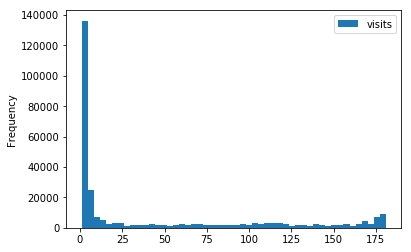

In [9]:
import matplotlib.pyplot as plt

shopper_visits = shoppers[['visits']]

shopper_visits_plt = shopper_visits.plot(kind='hist',bins=50)
plt.show(shopper_visits_plt)

Most shoppers only made one visit to the centre during the period.

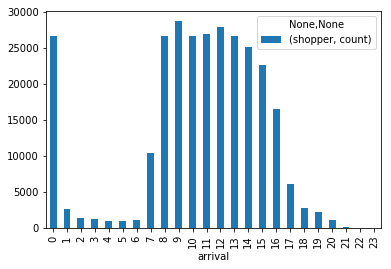

In [10]:
# Plot shopper visits by arrival time (hour)
import matplotlib.pyplot as plt

shopper_arrivals = shoppers[['shopper','arrival']].groupby(['arrival']).agg(['count'])

shopper_arrivals_plt = shopper_arrivals.plot(kind='bar')
plt.show(shopper_arrivals_plt)

# Proposed Clustering Techniques

Potential clustering techniques to be tried include:
- Linear SVC (sklearn.svm.LinearSVC)
- K-Means (sklearn.cluster.KMeans)
- DBScan (sklearn.cluster.dbscan)